In [1]:
import numpy as np
import cmdstanpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import arviz as az
import pandas as pd

In [2]:
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.28.2
Install directory: /home/nachshon/.cmdstan
CmdStan version 2.28.2 already installed


True

In [3]:
df = pd.read_csv('./mon.csv')
df['subn'] = df['sub'].rank(method='dense').astype(int)
df = df.dropna().sort_values('subn')

refValue = 5
refProbability = 1
refAmbiguity = 1

seed = 10112015

In [4]:
N = df.shape[0]
choice = df['choice'].astype(int)
refProbabilities = np.repeat(refProbability, N)
refValues=np.repeat(refValue, N)
lotteryProbabilities = df['risk'].astype(float)
ID = df['subn'].astype('int')
lotteryValues = df['value'].astype('int')
n_sub = len(df['sub'].unique())+1

In [5]:
# define dictionary of data
standata_simple = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [6]:
simpleModel = cmdstanpy.CmdStanModel(stan_file='simpleModel.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
fit_simple_model = simpleModel.sample(
  data = standata_simple,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing
ERROR:cmdstanpy:Error in progress bar initialization:
	IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Disabling progress bars for this session
Exception ignored in: <function tqdm.__del__ at 0x7f1f9c199430>
Traceback (most recent call last):
  File "/home/nachshon/anaconda3/envs/wmdm/lib/python3.8/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/home/nachshon/anaconda3/envs/wmdm/lib/python3.8/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


INFO:cmdstanpy:CmdStan done processing.


In [8]:
fit_simple_model.draws(concat_chains=True).shape

(4000, 16713)

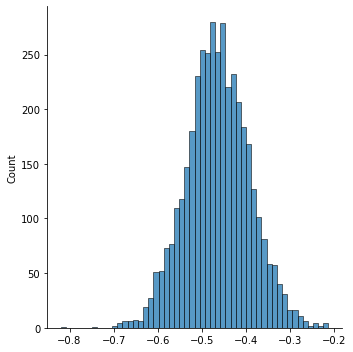

In [9]:
draws_rmu = fit_simple_model.stan_variable(var='rMu')
sns.displot(draws_rmu)

In [10]:
cmdstanpy_data = az.from_cmdstanpy(posterior=fit_simple_model)

In [11]:
az.summary(cmdstanpy_data, var_names=['riskTol'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.743,0.059,0.631,0.855,0.001,0.001,4625.0,3033.0,1.0
riskTol[1],0.146,0.028,0.091,0.199,0.001,0.000,3191.0,1982.0,1.0
riskTol[2],0.777,0.101,0.588,0.969,0.002,0.001,3233.0,2095.0,1.0
riskTol[3],0.276,0.042,0.199,0.357,0.001,0.000,3914.0,2407.0,1.0
riskTol[4],0.496,0.068,0.368,0.625,0.001,0.001,3653.0,2773.0,1.0
riskTol[5],0.307,0.039,0.233,0.379,0.001,0.000,4085.0,2255.0,1.0
riskTol[6],0.474,0.045,0.393,0.561,0.001,0.001,3559.0,2387.0,1.0
riskTol[7],0.714,0.058,0.601,0.816,0.001,0.001,3866.0,2538.0,1.0
riskTol[8],0.792,0.101,0.611,0.990,0.002,0.001,2595.0,2387.0,1.0
riskTol[9],0.548,0.041,0.472,0.623,0.001,0.000,4209.0,3252.0,1.0


In [31]:
AmbiguityModel = cmdstanpy.CmdStanModel(stan_file='/home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel.stan')

INFO:cmdstanpy:compiling stan file /home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel.stan to exe file /home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel
INFO:cmdstanpy:compiled model executable: /home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel


In [13]:
refAmbiguities = np.repeat(refAmbiguity, N)
lotteryAmbiguities = df['ambiguity'].astype(float)

In [14]:
# define dictionary of data
standata_ambiguity = {
    'N' : N,
    'choice' : choice,
    'refProbabilities' : refProbabilities,
    'refAmbiguities' : refAmbiguities,
    'refValues' : refValues,
    'lotteryProbabilities' : lotteryProbabilities,
    'lotteryAmbiguities' : lotteryAmbiguities,
    'ID' : ID,
    'lotteryValues' : lotteryValues,
    'n_sub': n_sub
}

In [32]:
fit_ambiguity_model = AmbiguityModel.sample(
  data = standata_ambiguity,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
cmdstanpy_data_amb = az.from_cmdstanpy(posterior=fit_ambiguity_model,
                                       posterior_predictive="y_hat",
                                       log_likelihood="log_lik")

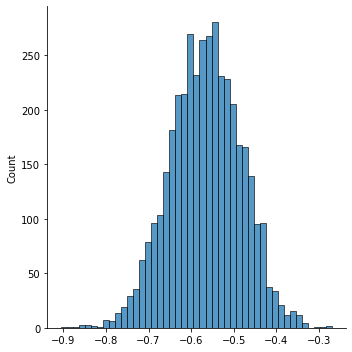

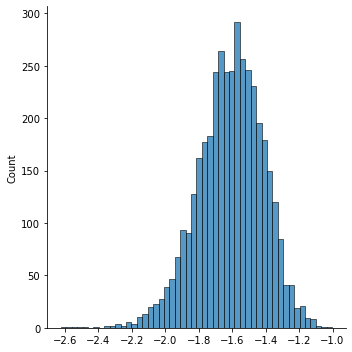

In [34]:
draws_rmu = fit_ambiguity_model.stan_variable(var='aMu')
draws_bmu = fit_ambiguity_model.stan_variable(var='bMu')
sns.displot(draws_rmu)
sns.displot(draws_bmu)

In [35]:
az.summary(cmdstanpy_data_amb, var_names=['riskTol'])[:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.709,0.058,0.609,0.823,0.001,0.001,6161.0,3088.0,1.0
riskTol[1],0.121,0.028,0.071,0.177,0.000,0.000,4524.0,3002.0,1.0
riskTol[2],0.663,0.101,0.477,0.851,0.002,0.001,4190.0,2913.0,1.0
riskTol[3],0.243,0.048,0.150,0.330,0.001,0.000,5122.0,2987.0,1.0
riskTol[4],0.403,0.072,0.262,0.536,0.001,0.001,3968.0,2481.0,1.0


In [36]:
az.summary(cmdstanpy_data_amb, var_names=['ambTol'])[:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ambTol[0],0.150,0.085,0.019,0.308,0.001,0.001,3972.0,2889.0,1.0
ambTol[1],0.077,0.046,0.007,0.163,0.001,0.001,3152.0,2253.0,1.0
ambTol[2],0.628,0.215,0.167,0.983,0.004,0.003,2702.0,1319.0,1.0
ambTol[3],0.098,0.060,0.009,0.211,0.001,0.001,3321.0,2817.0,1.0
ambTol[4],0.518,0.161,0.216,0.814,0.003,0.002,3463.0,2052.0,1.0


In [38]:
AmbiguityModel_p = cmdstanpy.CmdStanModel(stan_file='/home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel_priors.stan')

INFO:cmdstanpy:compiling stan file /home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel_priors.stan to exe file /home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel_priors
INFO:cmdstanpy:compiled model executable: /home/nachshon/Documents/Projects/Aging/Aging/RiskandAmbiguity/AmbiguityModel_priors


In [39]:
fit_ambiguity_model_info_prior = AmbiguityModel_p.sample(
  data = standata_ambiguity,
  chains = 4,
  iter_warmup = 1000,
  iter_sampling = 1000,
  adapt_delta = .9,
  inits = 0.2,
)

INFO:cmdstanpy:CmdStan start procesing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


In [41]:
cmdstanpy_data_amb_info_prior = az.from_cmdstanpy(posterior=fit_ambiguity_model_info_prior,
                                                  posterior_predictive="y_hat",
                                                  log_likelihood="log_lik")

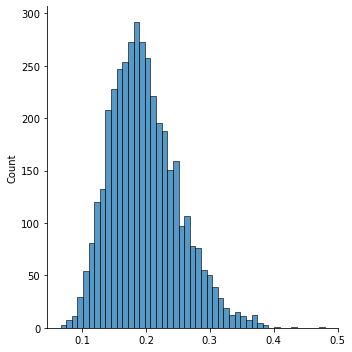

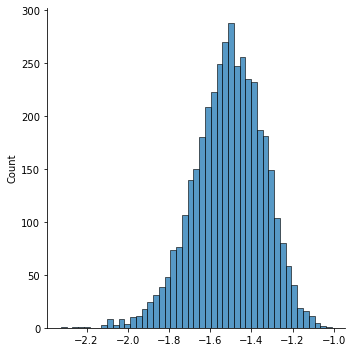

In [42]:
draws_amu_ip = fit_ambiguity_model_info_prior.stan_variable(var='aMu')
draws_bmu_ip = fit_ambiguity_model_info_prior.stan_variable(var='bMu')
sns.displot(draws_amu_ip)
sns.displot(draws_bmu_ip)

In [43]:
az.summary(cmdstanpy_data_amb_info_prior, var_names=['riskTol'])[:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
riskTol[0],0.713,0.059,0.603,0.821,0.001,0.001,5536.0,3079.0,1.0
riskTol[1],0.092,0.033,0.030,0.150,0.001,0.000,4047.0,2638.0,1.0
riskTol[2],0.683,0.105,0.497,0.883,0.002,0.002,2589.0,2238.0,1.0
riskTol[3],0.225,0.055,0.121,0.323,0.001,0.001,4290.0,2522.0,1.0
riskTol[4],0.398,0.075,0.248,0.535,0.001,0.001,3085.0,2292.0,1.0


In [44]:
az.summary(cmdstanpy_data_amb_info_prior, var_names=['ambTol'])[:5]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ambTol[0],0.156,0.082,0.016,0.304,0.001,0.001,3985.0,2301.0,1.0
ambTol[1],0.099,0.057,0.010,0.206,0.001,0.001,3270.0,2805.0,1.0
ambTol[2],0.612,0.220,0.166,0.997,0.004,0.003,2618.0,1387.0,1.0
ambTol[3],0.115,0.067,0.011,0.237,0.001,0.001,4136.0,2550.0,1.0
ambTol[4],0.527,0.158,0.228,0.825,0.003,0.002,2775.0,2002.0,1.0


In [46]:
az.compare({'informed':fit_ambiguity_model_info_prior, 'uninformed':fit_ambiguity_model}, ic='waic')

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
informed,0,-4021.718200,2.992622,0.000000,1.0,5.696689,0.000000,False,log
uninformed,1,-4022.406743,2.975501,0.688543,0.0,5.710452,0.204152,False,log
